# EXERCISE 1
Often in the context of trees(a graph without circle), a node with degree 1 is called a leaf. Write a function named get_leaves that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

first create a graph with edge list: [
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ]

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])


def get_leaves(G):
  nodes = G.nodes
  print(nodes)
  for node in nodes:
    if G.degree(node)==1:
      print(node)

get_leaves(G)

['a', 'b', 'd', 'c']
b
c


# EXERCISE 2

Write a function max_degree that takes a graph as its argument, and returns a 2-tuple with the name and degree of the node with highest degree.

friends.adjlist

```
George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly
```
**hints**:
1. create a file with name  "friends.adjlist" and above content.
2. use function "nx.read_adjlist('file path')" to read file.

In [ ]:
G = nx.read_adjlist('friends.adjlist')
def max_degree(G):
  nodes = G.nodes
  s ={}
  for node in nodes:
    s.update([(node,G.degree(node))])
  print(s)
#with defining lambda, you specify the object property you want to sort 
  sorteds = sorted(s.items(), key=lambda x: x[1], reverse=True)
  print("the name and degree of the node with highest degree:" , sorteds[0])
max_degree(G)

FileNotFoundError: ignored

# EXERCISE 3
Write a function mutual_friends that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes. For example, in the graph SG with friends.adjlist we have:

mutual_friends(SG, 'Alice', 'Claire') == ['Frank']

an empty list or set should be returned in the case where two nodes have no mutual friends, e.g. George and Bob in SG.

In [ ]:
SG = nx.read_adjlist('sample_data/friends.adjlist')

def mutual_friends(G, node_1, node_2):
  node_1_neighbors = set(G.neighbors(node_1))
  node_2_neighbors = set(G.neighbors(node_2))
  common = set.intersection(node_1_neighbors, node_2_neighbors)
  return common
# mutual_friends(SG, 'George', 'Bob')
# mutual_friends(SG, 'Claire', 'George')
mutual_friends(SG, 'Alice', 'Claire')

FileNotFoundError: ignored

# Flight Dataset

*The nodes in this graph are USA airports, represented by their [IATA](https://en.wikipedia.org/wiki/List_of_airports_by_IATA_airport_code:_A) codes; two nodes are connected with an edge if there is a scheduled flight directly connecting these two airports. The graph is undirected since a flight in one direction usually means there is a return flight.*

Solve Exercise 4 & 5 & 6 using this dataset


# EXERCISE 4
Is there a direct flight between Indianapolis and Fairbanks, Alaska (FAI)? A direct flight is one with no intermediate stops.

In [ ]:
import networkx as nx
G = nx.read_graphml('openflights_usa.graphml.gz')
shortest = nx.shortest_path_length(G, 'IND', 'FAI')
if shortest == 1:
   print('there is a direct flight between Indianapolis and Fairbanks, Alaska ' )

else:
   print("there is not a direct flight between Indianapolis and Fairbanks, Alaska")


FileNotFoundError: ignored

#EXERCISE 5 
If I wanted to fly from Indianapolis to Fairbanks, Alaska what would be an itinerary with the fewest number of flights?

In [ ]:
import networkx as nx
G = nx.read_graphml('openflights_usa.graphml.gz')
shortest = nx.shortest_path(G, 'IND', 'FAI')
print('The fewest number of flight option is: ' , shortest)


The fewest number of flight option is:  ['IND', 'BOS', 'SEA', 'FAI']


#EXERCISE 6

Is it possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?

 

In [ ]:
nx.is_connected(G)


False

# Exercise 7

Does the relative importance of a node in one network translate to about the same relative importance in another related network? To reveal that, investigate how the in-degree node centralities of the retweet and mentions correlate in given dataset.

**Dataset:** higgs-mention_network.edgelist.gz & higgs-retweet_network.edgelist.gz

Hints:


1.   Find the largest connected component of the retweet network, store it as a subgraph
2.   Measure indegree centralities of the mention network dataset and of the retweet subgraph
3.   Convert nodes & in-degree values into DataFrames for both the in-degree centralities of both mention and retweet  networks
4.   Get top 50 users considering mention in-degree counts
5.   Check if retweet in-degree dataframe has top 50 users, if so store them
6.   Prepare your Dataframes for concatenation with defining new ID column in your DataFrames
7.   Normalisation: Scale in-degree centrality counts between 0 and 1.
8.   Create a mapping between top mention ID's and top retweet ID's
9.   Concatenate InDegree Mentions and InDegree Retweet Mentions Networks in one DataFrame, with the defined new ID as unique ID of the DataFrame 
10.  To represent your correlation result, use one of vizualization package and your concatenated DataFrame
11.  Plot centrality scores for top 50 users

In [ ]:
import pandas as pd
G_R = nx.read_edgelist('/content/higgs-retweet_network.edgelist.gz',create_using=nx.DiGraph, data=[('weight',float)], nodetype=int)
G_M = nx.read_edgelist('/content/higgs-mention_network.edgelist.gz',create_using=nx.DiGraph, data=[('weight',float)], nodetype=int)

In [ ]:
#get the element with max length from existing paths between all pair of nodes, regardless of direction
rt_wcc = max(nx.weakly_connected_components(G_R), key=len)
#convert it to a graph
rt_wcc_sub = nx.subgraph(G_R, rt_wcc) 

In [ ]:
#In-degree centrality measures the number of edges others have initiated with a vertex
#For instance, if @Alice was mentioned 5 times by users in a Twitter topic-network, 
#her in-degree centrality metric would be 5
mention_indegree = nx.in_degree_centrality(G_M)
retweet_indegree = nx.in_degree_centrality(rt_wcc_sub)

In [ ]:
#convert them into dataframes
results_df = []
for nodeID, value in mention_indegree.items():
    results_df.append([nodeID, value])
    

mention_df = pd.DataFrame(results_df, columns=['nodeID', 'indegree_centrality'])

results_df = []
for nodeID, value in retweet_indegree.items():
    results_df.append([nodeID, value])
    

rt_indegree_df = pd.DataFrame(results_df, columns=['nodeID', 'indegree_centrality'])

In [ ]:
#top 50 users
mention_df= mention_df.sort_values('indegree_centrality', ascending=False).reset_index(drop=True)
mention_top = mention_df.head(50)

In [ ]:
rt_indeg_top = rt_indegree_df.loc[rt_indegree_df['nodeID'].isin(mention_top['nodeID'])].reset_index(drop=True)

In [ ]:
#It helps to normalize the data. It will scale the data between 0 and 1.
#for better understanding of data
def minmaxnorm(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [ ]:
import numpy as np
mention_top['id'] = 'InDegree Mentions Network'
rt_indeg_top['id'] = 'InDegree Retweet Network'
mention_top['norm_centrality'] = minmaxnorm(np.array(mention_top['indegree_centrality']))
rt_indeg_top['norm_centrality'] = minmaxnorm(np.array(rt_indeg_top['indegree_centrality']))

<ipython-input-14-5bdfe2889292>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mention_top['id'] = 'InDegree Mentions Network'
<ipython-input-14-5bdfe2889292>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mention_top['norm_centrality'] = minmaxnorm(np.array(mention_top['indegree_centrality']))


In [ ]:
mention_top['new_id'] = np.arange(1,51)
map_rank = dict(zip(mention_top.nodeID,mention_top['new_id']))
rt_indeg_top['new_id'] = rt_indeg_top['nodeID'].map(map_rank)

<ipython-input-15-edcfd7a5f142>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mention_top['new_id'] = np.arange(1,51)


In [ ]:
#concatenate df's
columns = ['new_id', 'norm_centrality', 'id']
df = pd.concat([mention_top[columns], rt_indeg_top[columns]], ignore_index=True)

df=df.sort_values('new_id').reset_index(drop=True)

df.set_index('new_id', inplace=True)

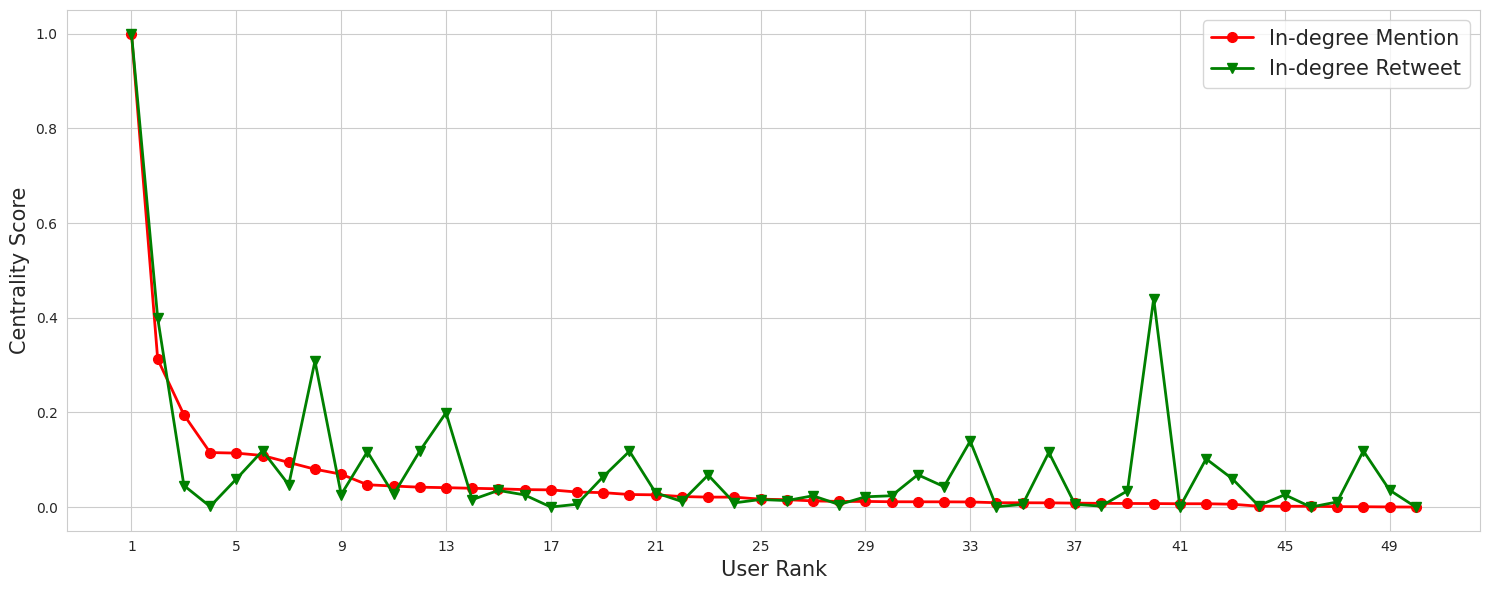

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
colors=['red', 'gold', 'green', 'blue', 'darkviolet',
'orange', 'pink', 'maroon', 'slategrey', 'indigo', 'crimson',
'wheat']
fig, ax1 = plt.subplots(figsize=(15,6))

df.query('id=="InDegree Mentions Network"')['norm_centrality'].plot(linestyle='-', lw=2,color=colors[0],label='In-degree Mention',marker='o', markersize=7,ax=ax1)
df.query('id=="InDegree Retweet Network"')['norm_centrality'].plot(linestyle='-', lw=2,color=colors[2],label='In-degree Retweet', marker='v',markersize=7,ax=ax1)

ax1.legend(loc='upper right', fontsize=15)
plt.xlabel("User Rank", fontsize=15)
plt.ylabel("Centrality Score", fontsize=15)
plt.xticks(np.arange(1, 51+1, 4))

plt.tight_layout()
